In [3]:
import pandas as pd
import glob
import pickle
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [4]:
import json
import urllib.request
import time

### Data from GoodReads

In [36]:
#create goodreads dataframe

all_files = glob.glob("goodreads/*.csv")
goodreads=pd.concat((pd.read_csv(f) for f in all_files))

In [37]:
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212906 entries, 0 to 34758
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     float64
 1   Name                   object 
 2   Rating                 object 
 3   Id                     float64
 4   Authors                object 
 5   ISBN                   object 
 6   PublishYear            float64
 7   PublishMonth           float64
 8   PublishDay             float64
 9   Publisher              object 
 10  RatingDist5            object 
 11  RatingDist4            object 
 12  RatingDist3            object 
 13  RatingDist2            object 
 14  RatingDist1            object 
 15  RatingDistTotal        object 
 16  CountsOfReview         float64
 17  Language               object 
 18  PagesNumber            float64
 19  Description            object 
 20  pagesNumber            float64
 21  Count of text reviews  float64
dtypes: float64(9), objec

In [38]:
#save goodreads dataframe
with open('goodreads.pickle', 'wb') as f:
    pickle.dump(goodreads, f)

### Data from NYTimes Bestsellers List

In [39]:
#create nyt bestsellers dataframe
nyt_best = pd.read_csv("bestsellers.csv")

In [40]:
nyt_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61430 entries, 0 to 61429
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   published_date      61430 non-null  object 
 1   list_name           61430 non-null  object 
 2   list_name_encoded   61430 non-null  object 
 3   rank                61430 non-null  int64  
 4   isbn13              61426 non-null  object 
 5   isbn10              60146 non-null  object 
 6   title               61430 non-null  object 
 7   author              61361 non-null  object 
 8   description         53311 non-null  object 
 9   amazon_product_url  61430 non-null  object 
 10  price               61430 non-null  float64
 11  weeks_on_list       61430 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 5.6+ MB


### Basic data cleaning

In [44]:
#only rows with ISBN
goodreads_ISBN = goodreads.dropna(subset=["ISBN"])

In [49]:
#rename "isbn10" to ISBN
nyt_best = nyt_best.rename(columns={"isbn10":"ISBN"})

In [51]:
#merging goodreads and nyt bestsellers dataframes
books_ratings = pd.merge(goodreads_ISBN,nyt_best,on="ISBN",how="outer")

In [129]:
# create bestseller column for target values

bestseller=[goodreads_ISBN["ISBN"].isin(nyt_best["ISBN"])]
goodreads_ISBN["Bestseller"] = np.select(bestseller,[1],default=0)


test_goodreads = goodreads_ISBN.assign(bseller=goodreads_ISBN.ISBN.isin(nyt_best.ISBN).astype(int))

### Sample of data with target column

In [67]:
goodreads_ISBN.sample(n=50)

,ID,Name,Rating,Id,Authors,ISBN,PublishYear,PublishMonth,PublishDay,Publisher,...,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews,Bestseller
52092,NaN,The Gospel According to John,4.62,391992.0,Anonymous,0802136192,1999.0,29.0,10.0,Grove Press,...,2:11,1:5,total:733,8.0,NaN,NaN,NaN,80.0,NaN,0
325701,NaN,Creed of the Dauntless,0.0,2807223.0,Frank B. Whitney,1406761230,2007.0,3.0,15.0,Whitney Press,...,2:0,1:0,total:0,0.0,NaN,200.0,"Many of the earliest books, particularly those...",NaN,NaN,0
15378,NaN,Thor y Loki: En la Tierra de los Gigantes ~ Un...,3.62,1844018.0,Jeff Limke,0822579693,2007.0,11.0,1.0,Ediciones Lerner,...,2:12,1:6,total:133,0.0,spa,48.0,"Out of the great halls of Asgard, home of the ...",NaN,NaN,0
13797,NaN,"A Book On Building, Civil And Ecclesiastical; ...",0.0,1931246.0,Edmund Beckett,1432518585,2007.0,4.0,10.0,Kessinger Publishing,...,2:0,1:0,total:0,0.0,NaN,420.0,This scarce antiquarian book is a facsimile re...,NaN,NaN,0
14246,NaN,Curious Wine,3.87,1744434.0,Katherine V. Forrest,1562800531,1993.0,1.0,5.0,Naiad Press,...,2:356,1:116,total:4532,1.0,NaN,NaN,"Ten years, seven printings and 100,000 copies ...",176.0,NaN,0
5686,NaN,Little Fish,4.67,1616999.0,Michael John LaChiusa,0822219735,2003.0,1.0,12.0,Dramatists Play Service,...,2:0,1:0,total:3,0.0,NaN,NaN,NaN,51.0,0.0,0
210921,NaN,Organization Theory: An Integrated Approach,4.0,3595708.0,Richard Osborn,0471021733,1980.0,3.0,10.0,John Wiley & Sons,...,2:0,1:0,total:1,0.0,NaN,611.0,A comprehensive treatment of a broad range of ...,NaN,NaN,0
128676,NaN,Der Deutsche Jugendliteraturpreis: Eine Wirkun...,0.0,2297863.0,Klaus Doderer,3779904446,1988.0,1.0,1.0,Juventa,...,2:0,1:0,total:0,0.0,NaN,328.0,NaN,NaN,NaN,0
40064,NaN,Negotiating the World Economy,3.4,471776.0,John S. Odell,0801437431,2000.0,2.0,5.0,Cornell University Press,...,2:1,1:0,total:5,0.0,NaN,NaN,NaN,272.0,NaN,0
22649,NaN,Work Without End: Abandoning Shorter Hours for...,3.83,1669156.0,Benjamin Kline Hunnicutt,0877225206,1988.0,10.0,5.0,Temple University Press,...,2:0,1:0,total:6,1.0,NaN,NaN,An extraordinarily informative scholarly histo...,404.0,1.0,0


In [68]:
print((goodreads_ISBN["Bestseller"] == 1).sum())

140


In [130]:
print((test_goodreads["bseller"] == 1).sum())

140


### Basic Logistic Regression looking at average rating, year published, and number of reviews

In [92]:
baseline = LogisticRegression()

In [110]:
X = goodreads_ISBN[["Rating","PublishYear","CountsOfReview"]]
y = goodreads_ISBN["Bestseller"]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=5)

In [112]:
baseline.fit(X_train,y_train)

LogisticRegression()

In [114]:
print("f1 score: " + str(f1_score(baseline.predict(X_test),y_test)))
print("precision: " + str(precision_score(baseline.predict(X_test),y_test)))
print("recall: " + str(recall_score(baseline.predict(X_test),y_test)))

f1 score: 0.0
precision: 0.0
recall: 0.0


In [121]:
print("training score: " + str(100*baseline.score(X_train,y_train)))
print("testing score: " + str(100*baseline.score(X_test,y_test)))

training score: 99.99118948105365
testing score: 99.99295159917371


In [117]:
base_confusion = confusion_matrix(y_test, baseline.predict(X_test))

<AxesSubplot:>

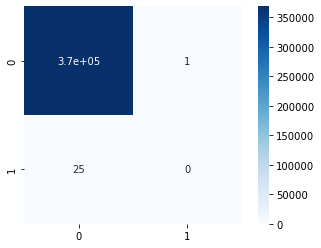

In [120]:
sns.heatmap(base_confusion, cmap=plt.cm.Blues,annot=True,square=True)

In [171]:
goodreads_newer = goodreads_ISBN.loc[(goodreads_ISBN["PublishYear"] >= 2010)]

In [172]:
goodreads_newer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22412 entries, 30 to 34663
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     0 non-null      float64
 1   Name                   22412 non-null  object 
 2   Rating                 22412 non-null  object 
 3   Id                     22412 non-null  float64
 4   Authors                22412 non-null  object 
 5   ISBN                   22412 non-null  object 
 6   PublishYear            22412 non-null  float64
 7   PublishMonth           22412 non-null  float64
 8   PublishDay             22412 non-null  float64
 9   Publisher              22207 non-null  object 
 10  RatingDist5            22412 non-null  object 
 11  RatingDist4            22412 non-null  object 
 12  RatingDist3            22412 non-null  object 
 13  RatingDist2            22412 non-null  object 
 14  RatingDist1            22412 non-null  object 
 15  R

In [174]:
def get_subjects(ISBN):
    #get book info from openlibrary
    url = "https://openlibrary.org/api/books?bibkeys=ISBN:"+ISBN+"&jscmd=data&format=json"
    with urllib.request.urlopen(url) as response:
        book = response.read()
    
    data = json.loads(book)
    
    try:
        #extract openlibrary identifier
        ol_id = list(data.values())[0].get("identifiers").get("openlibrary")[0]
    except:
        return [ ]
    
    #get openlibrary info
    new_url = "http://openlibrary.org/api/get?key=/b/" + str(ol_id)
    with urllib.request.urlopen(new_url) as response:
        ol_info = response.read()
    
    ol_info = str(ol_info)
    
    #extract subjects
    a = ol_info.partition("subjects\": [")[2]
    b = a.partition("], ")[0]
    subject_list = b.split(", ")
    
    return subject_list

In [155]:
goodreads_ISBN["Subjects"] = " "

In [1020]:
count =1
while (count < 280):

    if (count * 80) + 320 > 22412:
        print(count)
        break
        
    for i in range(count*80,(count*80)+320):
        a = goodreads_newer.iloc[i]["ISBN"]
        time.sleep(.1)
        goodreads_newer.iat[i, goodreads_newer.columns.get_loc("Subjects")] = get_subjects(a)
    
    with open('goodreads_clean.pickle', 'wb') as f:
        pickle.dump(goodreads_newer, f)
    
    time.sleep(20)
    print(count)
    count+=1
    counter+=1
    if count % 2 == 0:
        time.sleep(30)


279


In [1026]:
with open('goodreads_clean.pickle', 'wb') as f:
    pickle.dump(goodreads_newer, f)
    

In [1025]:
goodreads_newer.iloc[22411]

ID                                                                     NaN
Name                     Taking the Stress Out of Raising Great Kids: J...
Rating                                                                4.33
Id                                                               1499672.0
Authors                                                            Jim Fay
ISBN                                                            1930429835
PublishYear                                                         2010.0
PublishMonth                                                           1.0
PublishDay                                                             1.0
Publisher                                               Love & Logic Press
RatingDist5                                                            5:6
RatingDist4                                                            4:4
RatingDist3                                                            3:2
RatingDist2              

In [1040]:
goodreads_newer.head()

,ID,Name,Rating,Id,Authors,ISBN,PublishYear,PublishMonth,PublishDay,Publisher,...,RatingDistTotal,CountsOfReview,Language,PagesNumber,Description,pagesNumber,Count of text reviews,Bestseller,Subjects,5star
30,NaN,Science Framework for California Public School...,0.0,1900611.0,Curriculum Development and Supplemental Materi...,080111599X,2013.0,9.0,1.0,California Department of Education,...,total:0,0.0,NaN,310.0,NaN,NaN,NaN,0,[],0
55,NaN,"Atoms, Bytes and Genes: Public Resistance and ...",5.0,1900693.0,Martin W. Bauer,0415958032,2014.0,12.0,16.0,Routledge,...,total:1,0.0,NaN,342.0,"""Atom,"" ""byte"" and ""gene"" are metonymies for t...",NaN,NaN,0,"[""Sociology, Social Studies""]",1
115,NaN,Sitting Inside: Buddhist Practice in America's...,4.25,1900815.0,Kobai Scott Whitney,0971814309,2017.0,3.0,21.0,Prison Dharma Press,...,total:16,3.0,NaN,166.0,The book has two audiences: prison inmates who...,NaN,NaN,0,"[""Buddhism - General"", ""Buddhists"", ""Church wo...",7
165,NaN,The Adventure of Amelia Airheart Butterlfy in ...,3.67,1900940.0,Donna Perugini,0892743824,2010.0,4.0,21.0,"Yorkshire Publishging, Tulsa, OK",...,total:3,1.0,eng,32.0,Amelia Airheart Butterfly has a great friendsh...,NaN,NaN,0,"[""Butterflies -- Fiction."", ""Christian life --...",1
208,NaN,Awash with Color,4.33,1901079.0,Judy Turner,1561483737,2013.0,5.0,1.0,Good Books,...,total:6,2.0,eng,80.0,A watercolor quilt book that gives complete cu...,NaN,NaN,0,"[""Quilts & Quilting"", ""Patchwork"", ""Crafts & H...",3


In [1038]:
goodreads_newer["5star"] = 0
for i in range(0,len(goodreads_newer)):
    goodreads_newer.iat[i, goodreads_newer.columns.get_loc("5star")] = int(goodreads_newer.iloc[i]["RatingDist5"].partition(":")[2])


/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_70612/2973641108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodreads_newer["5star"] = 0


In [1041]:
#convert ratingdist to numeric 

goodreads_newer["4star"] = 0
for i in range(0,len(goodreads_newer)):
    goodreads_newer.iat[i, goodreads_newer.columns.get_loc("4star")] = int(goodreads_newer.iloc[i]["RatingDist4"].partition(":")[2])

goodreads_newer["3star"] = 0
for i in range(0,len(goodreads_newer)):
    goodreads_newer.iat[i, goodreads_newer.columns.get_loc("3star")] = int(goodreads_newer.iloc[i]["RatingDist3"].partition(":")[2])

goodreads_newer["2star"] = 0
for i in range(0,len(goodreads_newer)):
    goodreads_newer.iat[i, goodreads_newer.columns.get_loc("2star")] = int(goodreads_newer.iloc[i]["RatingDist2"].partition(":")[2])

goodreads_newer["1star"] = 0
for i in range(0,len(goodreads_newer)):
    goodreads_newer.iat[i, goodreads_newer.columns.get_loc("5star")] = int(goodreads_newer.iloc[i]["RatingDist1"].partition(":")[2])


/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_70612/2078787287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodreads_newer["4star"] = 0
/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_70612/2078787287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodreads_newer["3star"] = 0
/var/folders/6l/6tcwml6d7hqb9tfsn7kf5z6r0000gn/T/ipykernel_70612/2078787287.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [1046]:
goodreads_newer = goodreads_newer.drop(columns=["ID","RatingDist5","RatingDist4","RatingDist3","RatingDist2","RatingDist1"])

In [1047]:
goodreads_newer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22412 entries, 30 to 34663
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   22412 non-null  object 
 1   Rating                 22412 non-null  object 
 2   Id                     22412 non-null  float64
 3   Authors                22412 non-null  object 
 4   ISBN                   22412 non-null  object 
 5   PublishYear            22412 non-null  float64
 6   PublishMonth           22412 non-null  float64
 7   PublishDay             22412 non-null  float64
 8   Publisher              22207 non-null  object 
 9   RatingDistTotal        22412 non-null  object 
 10  CountsOfReview         22412 non-null  float64
 11  Language               3589 non-null   object 
 12  PagesNumber            13064 non-null  float64
 13  Description            16326 non-null  object 
 14  pagesNumber            9348 non-null   float64
 15  C

In [1054]:
goodreads_newer["total_ratings"] = 0
for i in range(0,len(goodreads_newer)):
    goodreads_newer.iat[i, goodreads_newer.columns.get_loc("total_ratings")] = int(goodreads_newer.iloc[i]["RatingDistTotal"].partition(":")[2])


In [1056]:
goodreads_newer = goodreads_newer.drop(columns=["RatingDistTotal","total_rating"])

In [1059]:
goodreads_newer = goodreads_newer.drop(columns=["Language","pagesNumber","Count of text reviews"])

In [1060]:
goodreads_newer.iloc[0:5]


,Name,Rating,Id,Authors,ISBN,PublishYear,PublishMonth,PublishDay,Publisher,CountsOfReview,PagesNumber,Description,Bestseller,Subjects,5star,4star,3star,2star,1star,total_ratings
30,Science Framework for California Public School...,0.0,1900611.0,Curriculum Development and Supplemental Materi...,080111599X,2013.0,9.0,1.0,California Department of Education,0.0,310.0,NaN,0,[],0,0,0,0,0,0
55,"Atoms, Bytes and Genes: Public Resistance and ...",5.0,1900693.0,Martin W. Bauer,0415958032,2014.0,12.0,16.0,Routledge,0.0,342.0,"""Atom,"" ""byte"" and ""gene"" are metonymies for t...",0,"[""Sociology, Social Studies""]",0,0,0,0,0,1
115,Sitting Inside: Buddhist Practice in America's...,4.25,1900815.0,Kobai Scott Whitney,0971814309,2017.0,3.0,21.0,Prison Dharma Press,3.0,166.0,The book has two audiences: prison inmates who...,0,"[""Buddhism - General"", ""Buddhists"", ""Church wo...",0,6,3,0,0,16
165,The Adventure of Amelia Airheart Butterlfy in ...,3.67,1900940.0,Donna Perugini,0892743824,2010.0,4.0,21.0,"Yorkshire Publishging, Tulsa, OK",1.0,32.0,Amelia Airheart Butterfly has a great friendsh...,0,"[""Butterflies -- Fiction."", ""Christian life --...",0,0,2,0,0,3
208,Awash with Color,4.33,1901079.0,Judy Turner,1561483737,2013.0,5.0,1.0,Good Books,2.0,80.0,A watercolor quilt book that gives complete cu...,0,"[""Quilts & Quilting"", ""Patchwork"", ""Crafts & H...",0,2,1,0,0,6


In [1061]:
goodreads_newer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22412 entries, 30 to 34663
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            22412 non-null  object 
 1   Rating          22412 non-null  object 
 2   Id              22412 non-null  float64
 3   Authors         22412 non-null  object 
 4   ISBN            22412 non-null  object 
 5   PublishYear     22412 non-null  float64
 6   PublishMonth    22412 non-null  float64
 7   PublishDay      22412 non-null  float64
 8   Publisher       22207 non-null  object 
 9   CountsOfReview  22412 non-null  float64
 10  PagesNumber     13064 non-null  float64
 11  Description     16326 non-null  object 
 12  Bestseller      22412 non-null  int64  
 13  Subjects        22412 non-null  object 
 14  5star           22412 non-null  int64  
 15  4star           22412 non-null  int64  
 16  3star           22412 non-null  int64  
 17  2star           22412 non-null

In [1062]:
with open('goodreads_clean.pickle', 'wb') as f:
    pickle.dump(goodreads_newer, f)

In [1066]:
second_logistic = LogisticRegression()

In [1067]:
X = goodreads_newer[["Rating","PublishYear","CountsOfReview",
                     "5star","4star","3star","2star","1star","total_ratings"]]
y = goodreads_newer["Bestseller"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state=5)
second_logistic.fit(X_train,y_train)

LogisticRegression()

In [1068]:
print("f1 score: " + str(f1_score(second_logistic.predict(X_test),y_test)))
print("precision: " + str(precision_score(second_logistic.predict(X_test),y_test)))
print("recall: " + str(recall_score(second_logistic.predict(X_test),y_test)))

f1 score: 0.0
precision: 0.0
recall: 0.0
